In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import  load_img, ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, GlobalAvgPool2D, Input
from tensorflow.keras import callbacks, optimizers
import tensorflow as tf

from google.colab import drive 
import numpy as np
import os
import matplotlib.pyplot as plt ### plotting bar chart

In [ ]:
drive.mount('/content/drive')

In [ ]:
%cd drive/MyDrive/Coffee

/content/drive/MyDrive/Coffee


In [ ]:
!pwd

/content/drive/MyDrive/Coffee


In [ ]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/Phoma/2 (837).jpg  
  inflating: raw-img/Phoma/2 (838).jpg  
  inflating: raw-img/Phoma/2 (839).jpg  
  inflating: raw-img/Phoma/2 (84).jpg  
  inflating: raw-img/Phoma/2 (840).jpg  
  inflating: raw-img/Phoma/2 (841).jpg  
  inflating: raw-img/Phoma/2 (842).jpg  
  inflating: raw-img/Phoma/2 (843).jpg  
  inflating: raw-img/Phoma/2 (844).jpg  
  inflating: raw-img/Phoma/2 (845).jpg  
  inflating: raw-img/Phoma/2 (846).jpg  
  inflating: raw-img/Phoma/2 (847).jpg  
  inflating: raw-img/Phoma/2 (848).jpg  
  inflating: raw-img/Phoma/2 (849).jpg  
  inflating: raw-img/Phoma/2 (85).jpg  
  inflating: raw-img/Phoma/2 (850).jpg  
  inflating: raw-img/Phoma/2 (851).jpg  
  inflating: raw-img/Phoma/2 (852).jpg  
  inflating: raw-img/Phoma/2 (853).jpg  
  inflating: raw-img/Phoma/2 (854).jpg  
  inflating: raw-img/Phoma/2 (855).jpg  
  inflating: raw-img/Phoma/2 (856).jpg  
  inflating: raw-img/Phoma/2 (857).jpg  
  inflat

In [ ]:
# from translate import translate

In [ ]:
# translate

{'butterfly': 'farfalla',
 'cane': 'dog',
 'cat': 'gatto',
 'cavallo': 'horse',
 'chicken': 'gallina',
 'cow': 'mucca',
 'dog': 'cane',
 'elefante': 'elephant',
 'elephant': 'elefante',
 'farfalla': 'butterfly',
 'gallina': 'chicken',
 'gatto': 'cat',
 'mucca': 'cow',
 'pecora': 'sheep',
 'scoiattolo': 'squirrel',
 'spider': 'ragno',
 'squirrel': 'scoiattolo'}

In [ ]:
# for i in os.listdir("raw-img"):
#   try:
#     os.rename("raw-img/"+i,"raw-img/"+translate[i])
#   except Exception as e:
#     print(e)

'ragno'


In [ ]:
!ls raw-img

 Cerscospora   Healthy	'Leaf rust'   Miner   Phoma


In [ ]:
# for i in os.listdir("raw-img"):
#   print(i,len(os.listdir("raw-img/"+i)))

dog 4863
horse 2623
elephant 1446
butterfly 2112
chicken 3098
cat 1668
cow 1866
sheep 1820
ragno 4821
squirrel 1862


In [ ]:
# for i in os.listdir("raw-img"):
#   print (i)

Cerscospora
Healthy
Leaf rust
Miner
Phoma


In [ ]:
for i in os.listdir("raw-img"):
  print(i,len(os.listdir("raw-img/"+i)))

Cerscospora 7681
Healthy 18984
Leaf rust 8336
Miner 16978
Phoma 6571


In [ ]:
# try:
#   os.mkdir("train")
#   os.mkdir("test")
# except:
#   pass
# for i in os.listdir("raw-img"):
#   try:
#     os.mkdir("train/"+i)
#     os.mkdir("test/"+i)
#   except:
#     pass
#   for j in os.listdir("raw-img/"+i)[:1000]:
#     os.rename("raw-img/"+i+"/"+j, "train/"+i+"/"+j)
#   for j in os.listdir("raw-img/"+i)[:400]:
#     os.rename("raw-img/"+i+"/"+j, "test/"+i+"/"+j)

In [ ]:
try:
  os.mkdir("train")
  os.mkdir("test")
except:
  pass
for i in os.listdir("raw-img"):
  try:
    os.mkdir("train/"+i)
    os.mkdir("test/"+i)
  except:
    pass
  for j in os.listdir("raw-img/"+i)[:5200]:
    os.rename("raw-img/"+i+"/"+j, "train/"+i+"/"+j)
  for j in os.listdir("raw-img/"+i)[:1300]:
    os.rename("raw-img/"+i+"/"+j, "test/"+i+"/"+j)

In [ ]:
!ls train

 Cerscospora   Healthy	'Leaf rust'   Miner   Phoma


In [ ]:
!ls test

 Cerscospora   Healthy	'Leaf rust'   Miner   Phoma


In [ ]:
def img_data(dir_path, target_size, batch, class_lst, preprocessing):
  if preprocessing:
    gen_object = ImageDataGenerator(preprocessing_function=preprocessing)
  else:
    gen_object = ImageDataGenerator()

  return(gen_object.flow_from_directory(dir_path, 
                                   target_size=target_size, 
                                   batch_size=batch, 
                                   class_mode='sparse', 
                                   classes=class_lst,
                                   shuffle=True))

In [ ]:
train_data_generator = img_data('train', (224,224), 500, os.listdir('train'), preprocess_input)
valid_data_generator = img_data('test',  (224,224), 500, os.listdir('test'),  preprocess_input)

Found 26000 images belonging to 5 classes.
Found 6500 images belonging to 5 classes.


In [ ]:
train_data_generator

In [ ]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
            input_shape=(224,224,3), alpha=1.0, include_top=False, weights='imagenet',
            input_tensor=None, pooling=None, classes=1000,
            classifier_activation='softmax')

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(GlobalAvgPool2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1024)              1311744   
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,579,978
Trainable params: 1,321,994
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='loss', patience=5, mode='min')
save_checkpoint = callbacks.ModelCheckpoint('.coffee_model_new.hdf5', save_best_only=True, monitor='loss', mode='min')

In [ ]:
history = model.fit(train_data_generator, batch_size=100, validation_data=valid_data_generator, callbacks=[early_stop, save_checkpoint], epochs=1)

52/52 [==============================] - 916s 17s/step - loss: 0.1656 - accuracy: 0.9442 - val_loss: 0.0053 - val_accuracy: 0.9997


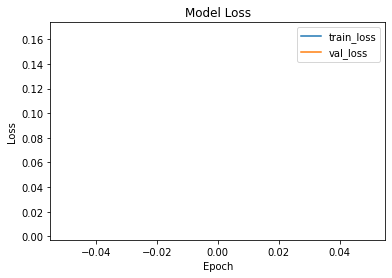

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

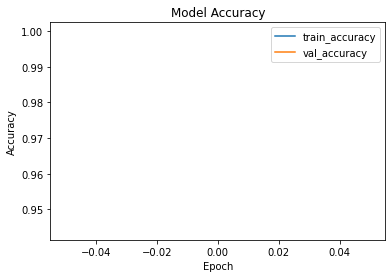

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
history.history

{'accuracy': [0.9442307949066162],
 'loss': [0.16564950346946716],
 'val_accuracy': [0.9996923208236694],
 'val_loss': [0.005311348009854555]}

In [ ]:
train_data_generator.class_indices

{'Cerscospora': 0, 'Healthy': 1, 'Leaf rust': 2, 'Miner': 3, 'Phoma': 4}

In [ ]:
model.save('coffe_model_new.hdf5')